In [84]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

In [85]:
# 使用GPU
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [86]:
! nvidia-smi

Sun Jun 12 19:14:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 30%   39C    P8    21W / 260W |     22MiB / 11019MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 29%   

# MongoDB

In [87]:
from pymongo import MongoClient
import pymongo

In [88]:
mongoURI = "mongodb://%s:%s@%s/%s?authMechanism=SCRAM-SHA-1" % ("eva", "eva_30241", "140.117.69.70:30241", "eva")

try:
    conn = pymongo.MongoClient(mongoURI)
    db = conn.eva
    # db_de = db.patent_de
    # db_us = db.patent_us
    # db_cn = db.patent_cn

    db_rm_cn_2013 = db.rm_patent_cn_2013
    db_rm_us_2013 = db.rm_patent_us_2013
    db_rm_de_2013 = db.rm_patent_de_2013

    
except errors.ConnectionFailure as err:
    print(err)

# 2013

## Company數量

In [89]:
data_assignee = db_rm_de_2013.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])

In [90]:
df_family_de = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [91]:
data_assignee = db_rm_cn_2013.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_cn = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [92]:
data_assignee = db_rm_us_2013.aggregate([
    {"$unwind" : "$current_assignee"},
    {"$group" : {"_id" : "$current_assignee", "count":{"$sum":1}}},
    {"$sort": {"count":-1}},
    {"$limit":30}
])

ls_company = []
ls_count = []
for data in data_assignee:
    # print(data["_id"],data["count"])
    ls_company.append(data["_id"])
    ls_count.append(data["count"])
    
df_family_us = pd.DataFrame((zip(ls_company, ls_count)), columns = ['company', 'count'])

In [93]:
final_df = pd.concat([df_family_de,df_family_cn,df_family_us],axis=0)

In [94]:
# 取總數前15家公司
final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(50)

,company,count
28,Jiangsu IoT Research and Development Center,63
33,Nanjing IoT Sensor Technology Co Ltd,55
9,Cisco Technology Inc,38
6,Chengdu Qinchuan IoT Technology Co Ltd,34
8,China core Microelectronics Technology Chengdu...,22
54,The reservoir Hengke IOT System Co Ltd,21
46,Shanghai Nenggan Epc System Network Co Ltd,16
7,China United Creation (fujian) Internet Of Thi...,14
31,LG Electronics Inc,13
56,XIAMEN XINDECO IOT TECHNOLOGY Ltd,13


In [95]:
com_df = final_df.groupby("company").sum().reset_index().sort_values("count",ascending=False).head(15)
com_df.drop([7], axis=0,inplace=True)
com_df = com_df.append({"company":"Samsung Electronics Co Ltd","count":3}, ignore_index=True)
com_df.reset_index(drop=True, inplace=True)

In [96]:
com_df["count_log"] = com_df["count"].apply(lambda x: np.log(x))
com_df

,company,count,count_log
0,Jiangsu IoT Research and Development Center,63,4.143135
1,Nanjing IoT Sensor Technology Co Ltd,55,4.007333
2,Cisco Technology Inc,38,3.637586
3,Chengdu Qinchuan IoT Technology Co Ltd,34,3.526361
4,China core Microelectronics Technology Chengdu...,22,3.091042
5,The reservoir Hengke IOT System Co Ltd,21,3.044522
6,Shanghai Nenggan Epc System Network Co Ltd,16,2.772589
7,LG Electronics Inc,13,2.564949
8,XIAMEN XINDECO IOT TECHNOLOGY Ltd,13,2.564949
9,Shenzhen Shenglu Iot Communication Technology ...,12,2.484907


In [98]:
com_ls = list(com_df.company)

## Data

In [99]:
ccontry = pd.read_csv("./final_data/rm_company_country_all_2013.csv")
ccpc = pd.read_csv("./final_data/rm_company_cpc_all_2013.csv")

In [100]:
ccontry[ccontry.company.isin(com_ls)].head()

,company,AR,AU,BR,CA,CL,CN,CO,CR,DE,...,RS,RU,SA,SG,SI,TN,TW,UA,US,ZA
68,Chengdu Qinchuan IoT Technology Co Ltd,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
100,China core Microelectronics Technology Chengdu...,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,Cisco Technology Inc,0.0,0.0,0.0,3.0,0.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0
247,Jiangsu IoT Research and Development Center,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,LG Electronics Inc,0.0,1.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0


In [101]:
ccontry.company[0]

'1st Engineering Co Ltd of MBEC'

In [102]:
# China United Creation (fujian) Internet Of Things Information Science & Technology Co Ltd

## Similarity計算

### Country

- 換成機率  

In [103]:
ccontry.set_index("company", inplace=True)
ccontry2 = ccontry.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

### PBC
- 和Samsung Electronics Co Ltd比較

In [104]:
ccontry_pbc = ccontry2.loc[com_ls,:].copy()
ccontry_pbc.head()

,AR,AU,BR,CA,CL,CN,CO,CR,DE,DK,...,RS,RU,SA,SG,SI,TN,TW,UA,US,ZA
company,,,,,,,,,,,,,,,,,,,,,
Jiangsu IoT Research and Development Center,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Nanjing IoT Sensor Technology Co Ltd,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Cisco Technology Inc,0.0,0.0,0.0,0.044118,0.0,0.161765,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.558824,0.0
Chengdu Qinchuan IoT Technology Co Ltd,0.0,0.0,0.0,0.000000,0.0,0.850000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.0
"China core Microelectronics Technology Chengdu Co.,Ltd.",0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [105]:
def PBC(a,b):
    return sum(a*b)

ccontry_pbc["sum"] = ccontry_pbc.apply(lambda x: PBC(ccontry_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

### CPC

In [106]:
ccpc.set_index("company", inplace=True)
ccpc2 = ccpc.apply(lambda x: x/sum(x), axis=1) #比例 row(axis=1)加總為1

In [107]:
# ccpc_pbc = ccpc2.loc[com_ls,:].copy()
ccpc_pbc = ccpc2[ccpc2.index.isin(com_ls)]
# ccpc_pbc

In [108]:
def PBC(a,b):
    return sum(a*b)

ccpc_pbc["sum"] = ccpc_pbc.apply(lambda x: PBC(ccpc_pbc.loc["Samsung Electronics Co Ltd",:],x), axis=1)

## Scatter Plot

In [109]:
# loop test
def scatter_plot(pbc_n,cpc_n):
    # PBC
    pbc_ls=[]
    n = pbc_n
    for i in ccontry_pbc.index:
        pbc = ccontry_pbc.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Samsung Electronics Co Ltd"].values-com_df.count_log[com_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccontry_pbc["pbc"]=pbc_ls
    
    # CPC
    pbc_ls=[]
    n = cpc_n
    for i in ccpc_pbc.index:
        pbc = ccpc_pbc.loc[[i],:]["sum"].values+n*((com_df.count_log[com_df.company=="Samsung Electronics Co Ltd"].values-com_df.count_log[com_df.company==i].values)**2)
        pbc_ls.append(pbc[0])

    ccpc_pbc["pbc"]=pbc_ls
    
    c_df = pd.DataFrame((zip(list(ccpc_pbc["pbc"]), list(ccontry_pbc["pbc"]))), columns = ['cpc', 'country'])
    c_df.set_index(ccpc_pbc.index, inplace=True)

    return c_df

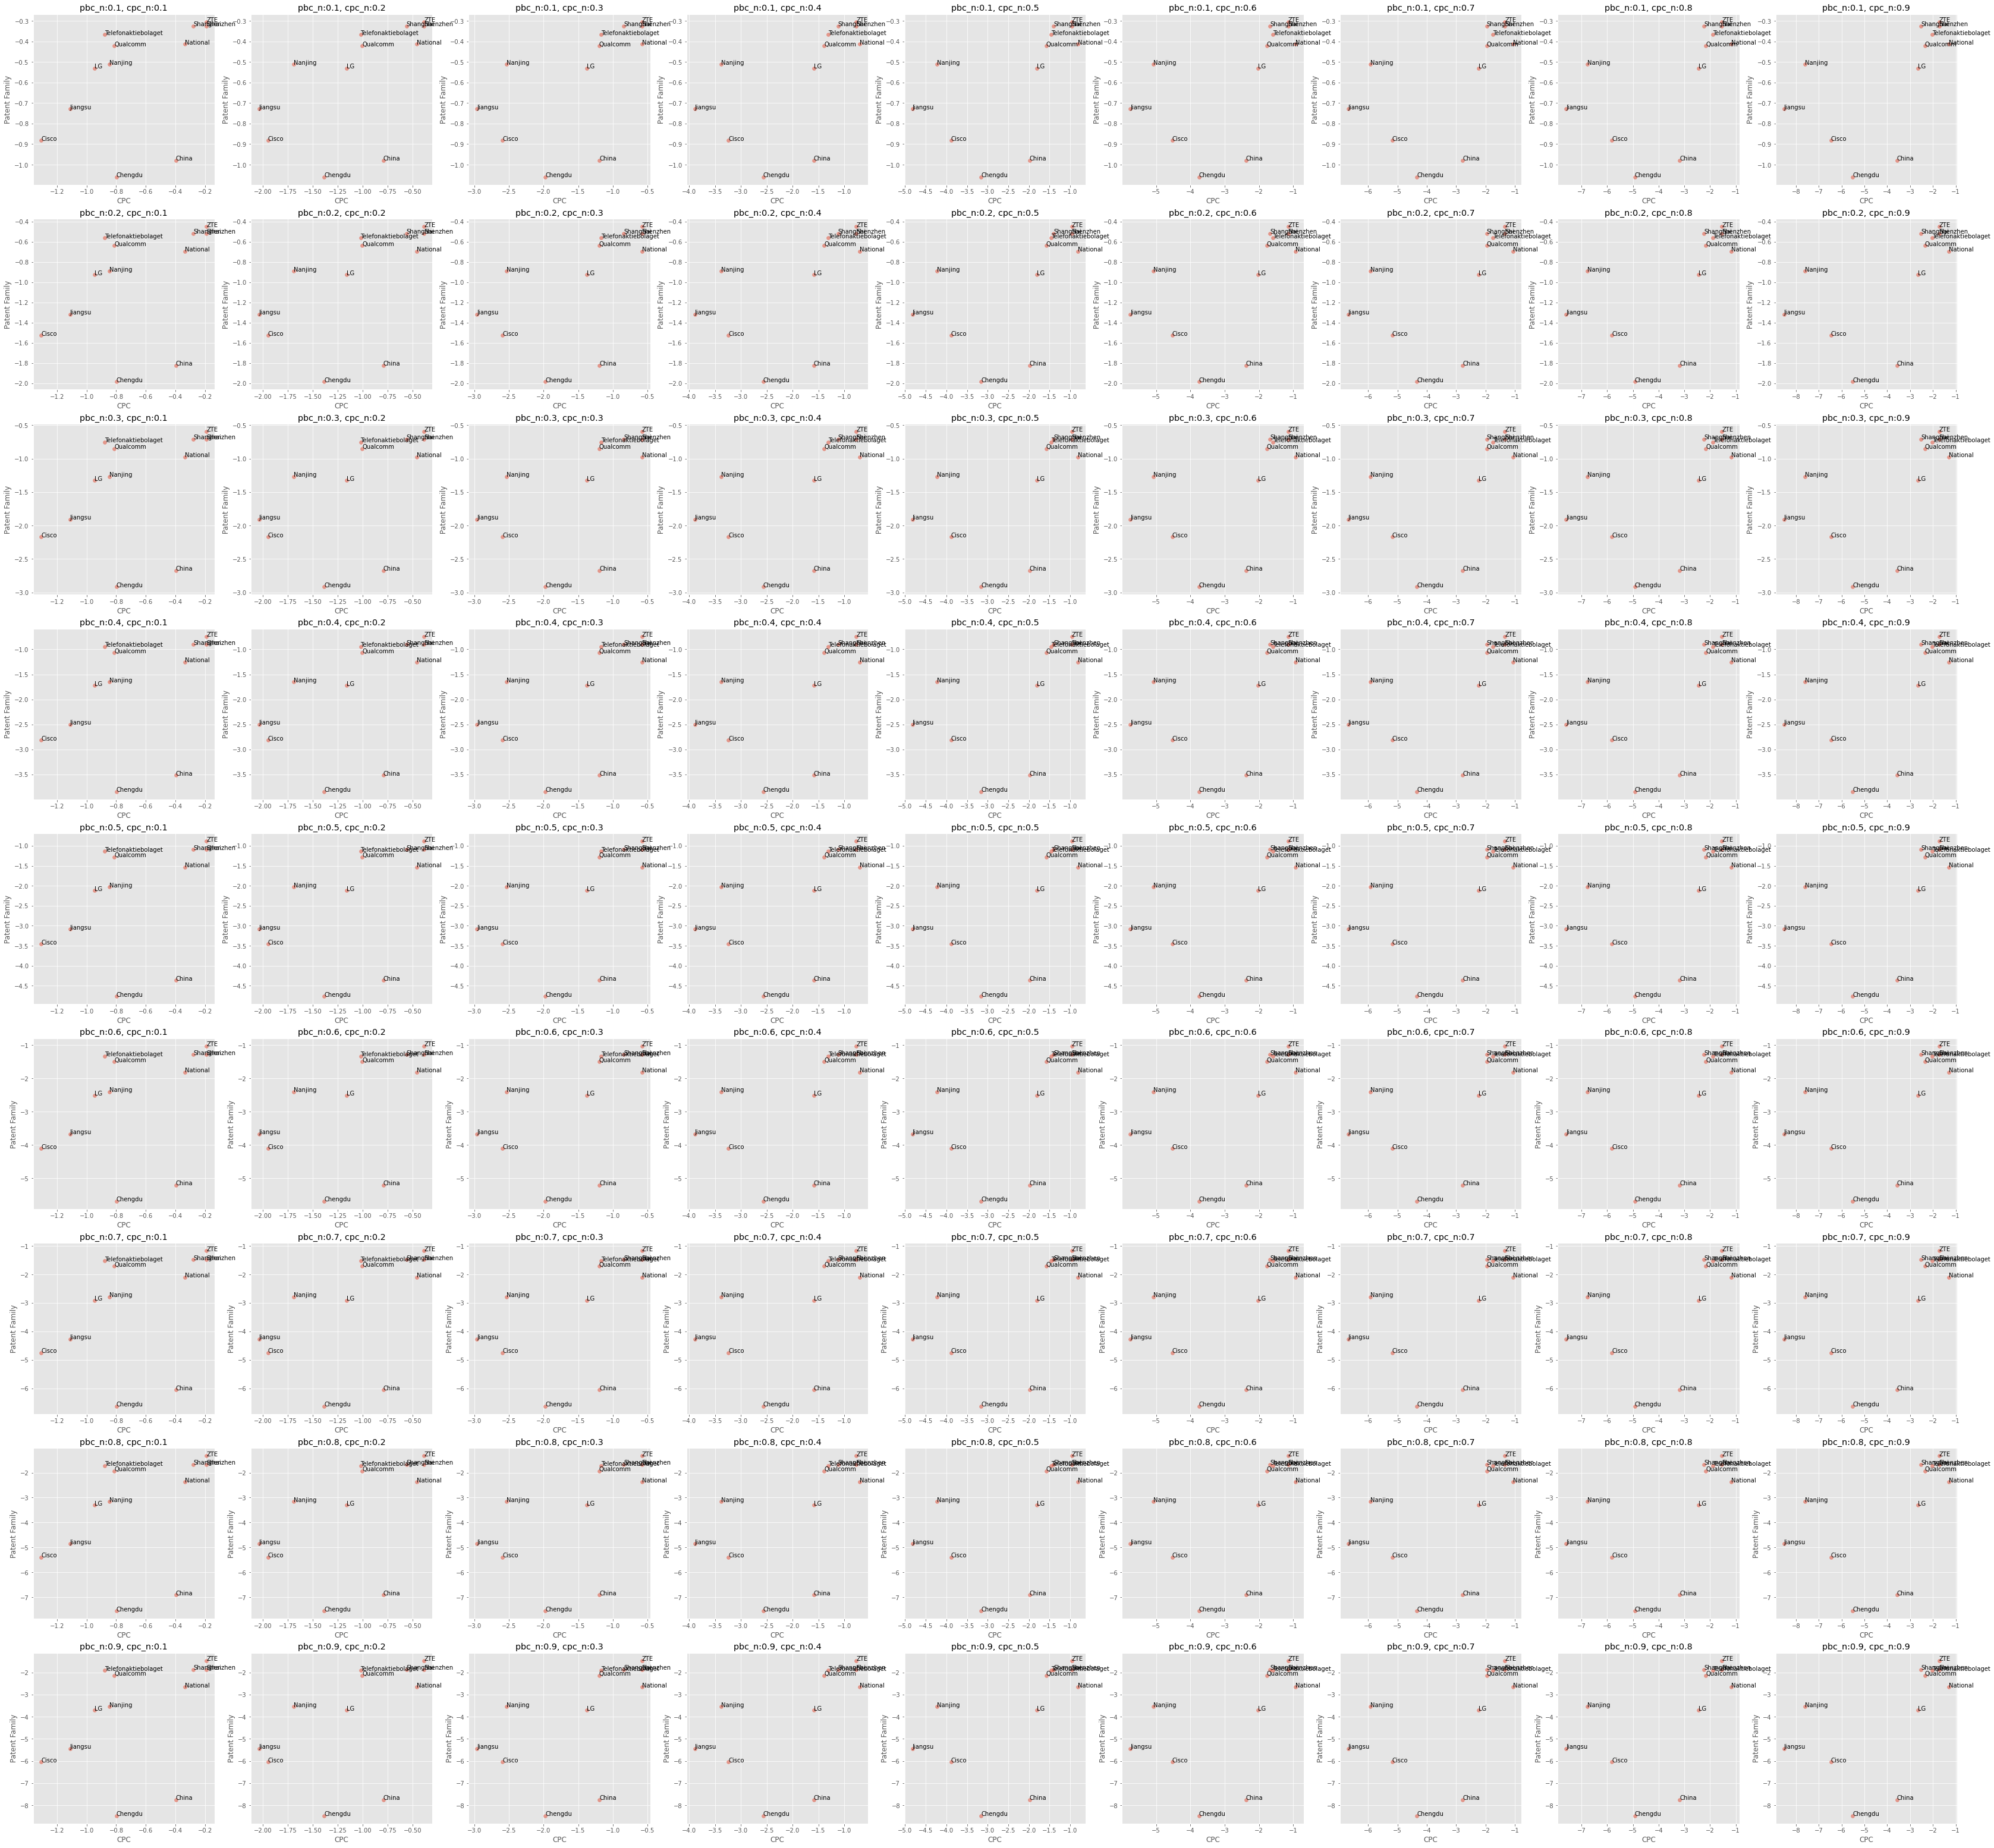

In [110]:
pbc_n_ls=np.arange(0.1,1,0.1)
cpc_n_ls=np.arange(0.1,1,0.1)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_all_2013_1.png'.format(pbc_n))

In [111]:
c_df

,cpc,country
company,,
Chengdu Qinchuan IoT Technology Co Ltd,5.513574,8.475539
"China core Microelectronics Technology Chengdu Co.,Ltd.",3.572800,7.747925
Cisco Technology Inc,6.462670,6.039985
Jiangsu IoT Research and Development Center,8.527533,5.444565
LG Electronics Inc,2.667154,3.706133
Nanjing IoT Sensor Technology Co Ltd,7.614592,3.541243
National Center for Advanced Packaging Co Ltd,1.302470,2.655311
Qualcomm Inc,2.351009,2.142222
Shanghai Nenggan Epc System Network Co Ltd,2.521977,1.862964


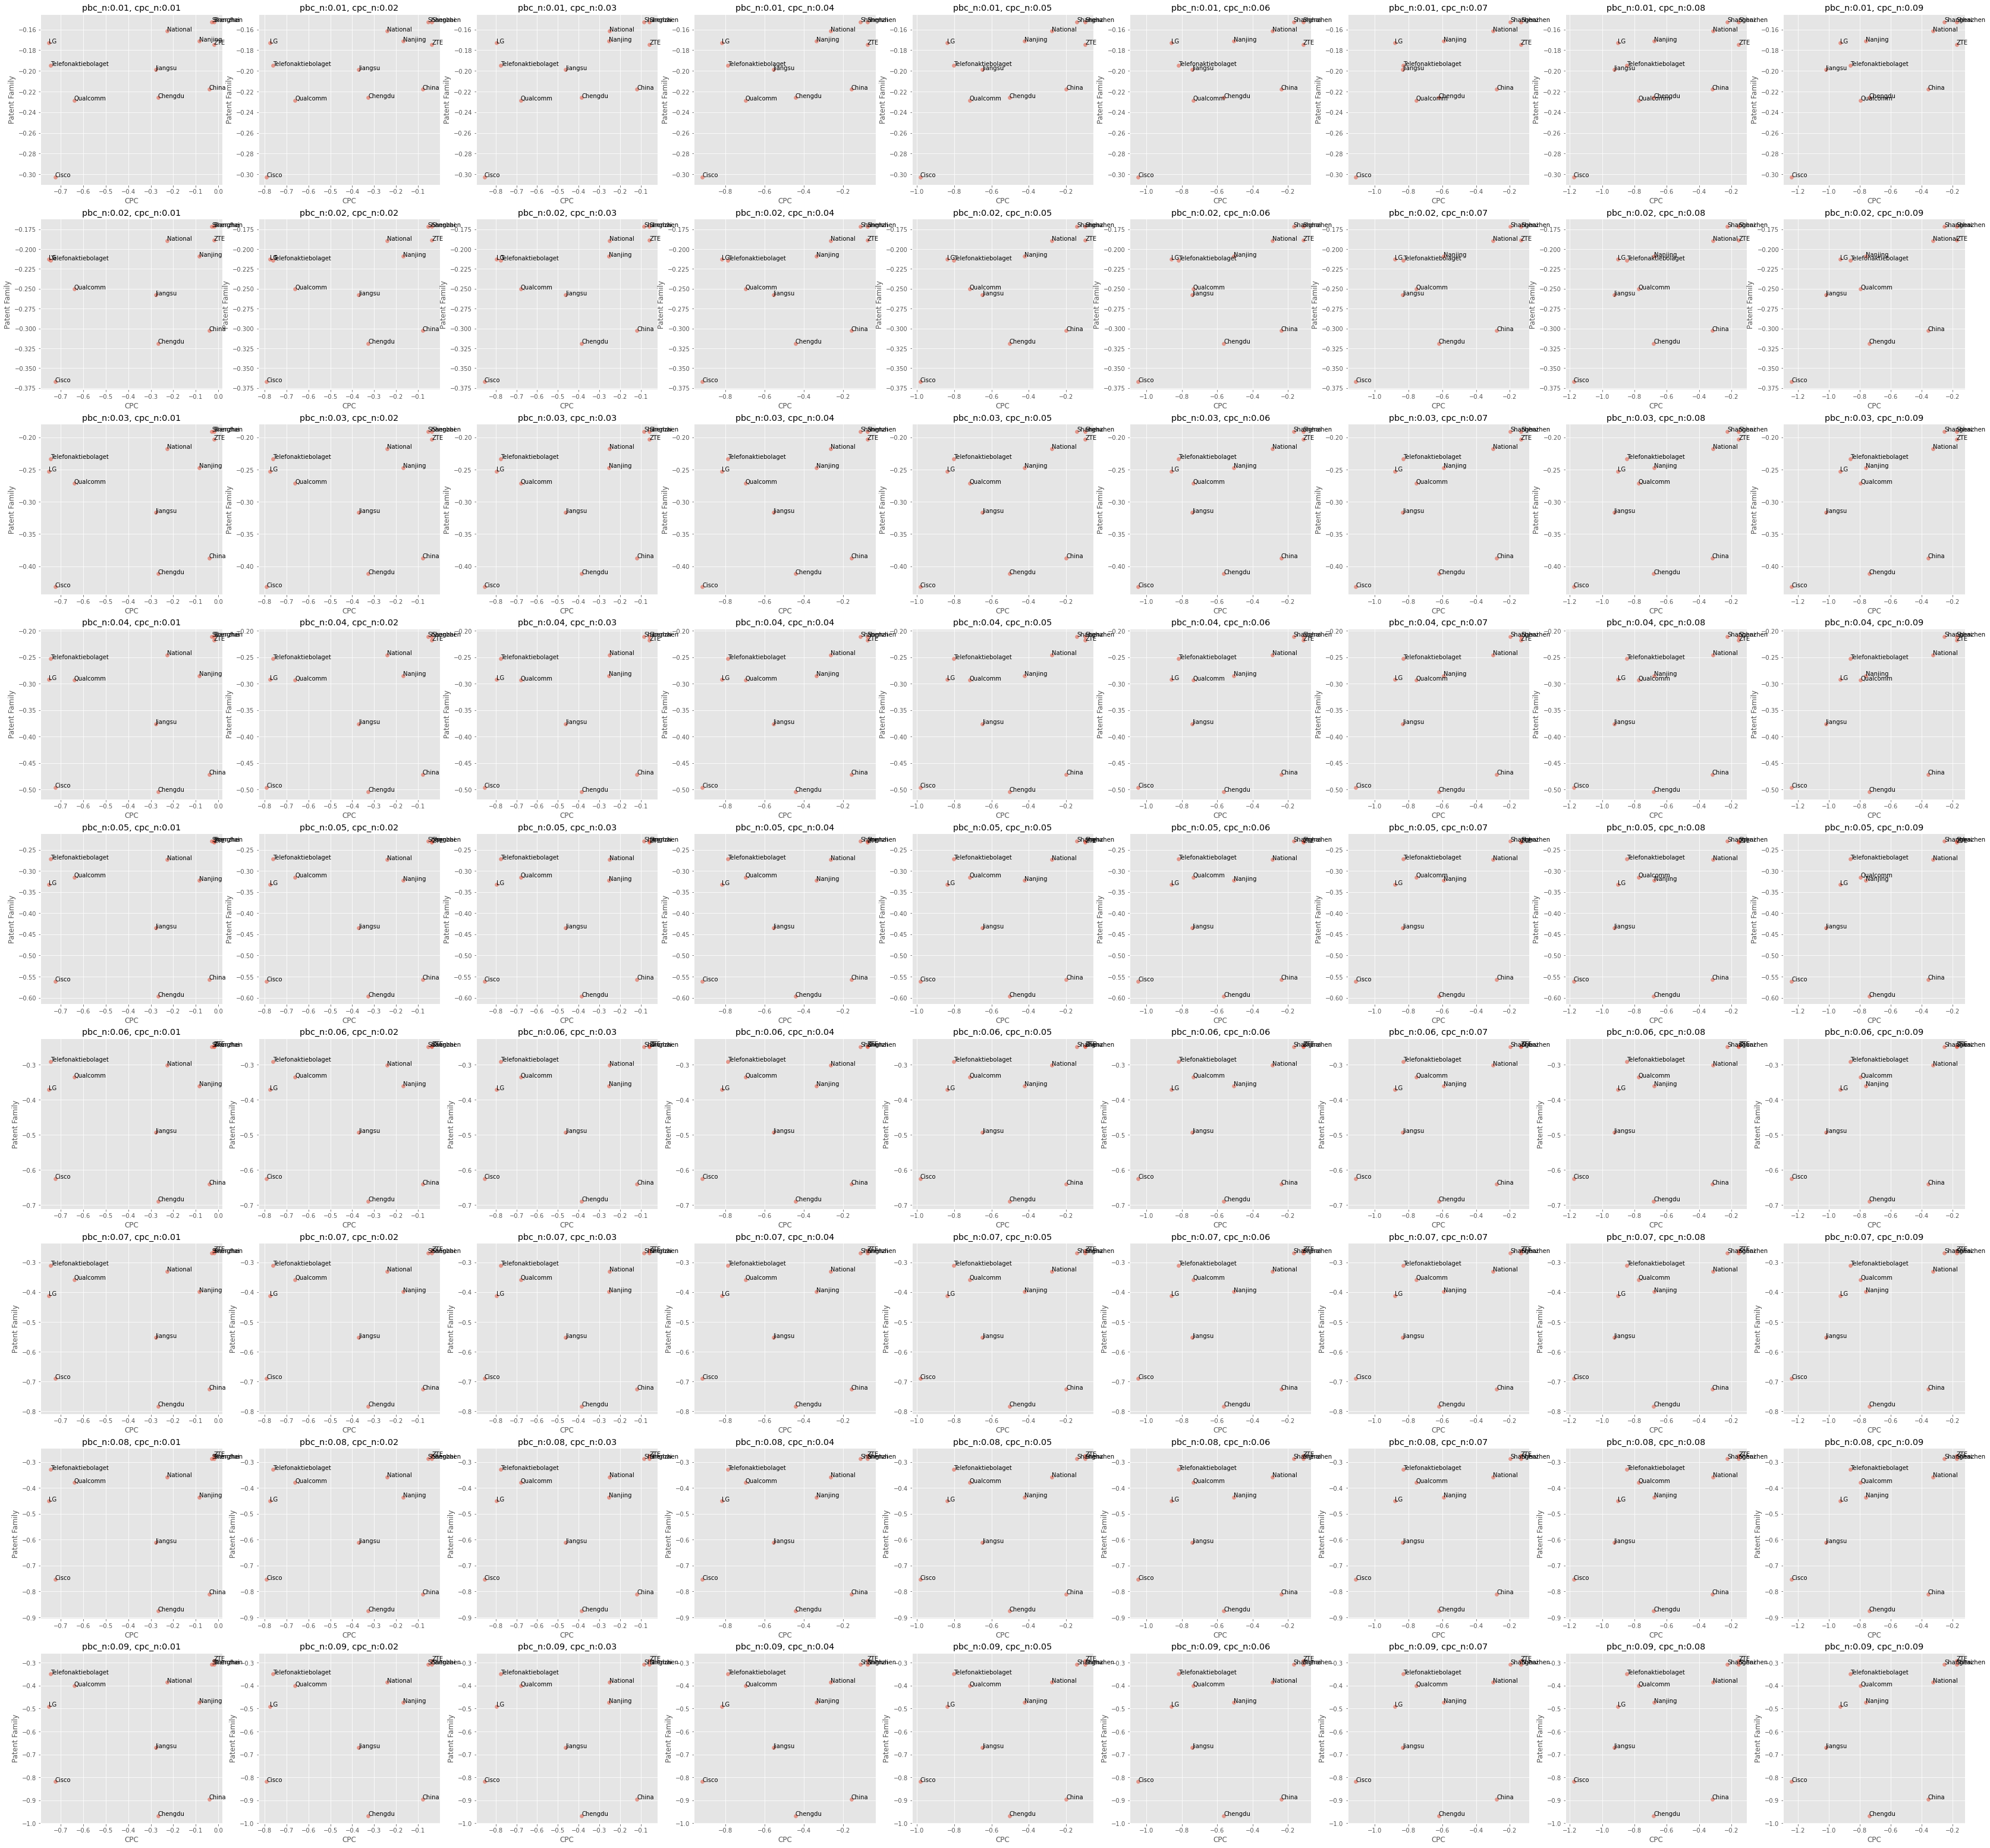

In [112]:
pbc_n_ls=np.arange(0.01,0.1,0.01)
cpc_n_ls=np.arange(0.01,0.1,0.01)

n=0
plt.figure(figsize=(58,56))
plt.style.use('ggplot')

for i,pbc_n in enumerate(pbc_n_ls):
    for k,cpc_n in enumerate(cpc_n_ls):
        # print(pbc_n,cpc_n)
        c_df = scatter_plot(pbc_n,cpc_n)
        c_df = c_df.drop("Samsung Electronics Co Ltd")
        

        #plot
        plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
        plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
        plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
        plt.xlabel("CPC")
        plt.ylabel("Patent Family")

        for i, txt in enumerate(c_df.index):
            plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

            
        n+=1
plt.savefig('./img/plot_all_2013_2.png'.format(pbc_n))

In [113]:
c_df

,cpc,country
company,,
Chengdu Qinchuan IoT Technology Co Ltd,0.739466,0.967554
"China core Microelectronics Technology Chengdu Co.,Ltd.",0.357280,0.894792
Cisco Technology Inc,1.241095,0.818410
Jiangsu IoT Research and Development Center,1.019549,0.670457
LG Electronics Inc,0.925537,0.490613
Nanjing IoT Sensor Technology Co Ltd,0.761459,0.474124
National Center for Advanced Packaging Co Ltd,0.324842,0.385531
Qualcomm Inc,0.794341,0.400605
Shanghai Nenggan Epc System Network Co Ltd,0.252198,0.306296


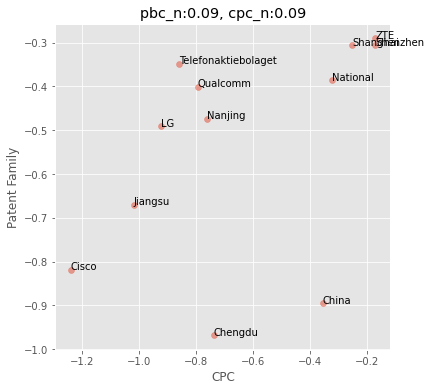

In [114]:
plt.figure(figsize=(6,6))
plt.style.use('ggplot')
c_df = scatter_plot(0.09,0.09)
c_df = c_df.drop("Samsung Electronics Co Ltd")

#plot
# plt.subplot(len(pbc_n_ls), len(cpc_n_ls), n + 1)
plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)
plt.title("pbc_n:{}, cpc_n:{}".format(round(pbc_n,2),round(cpc_n,2)))
plt.xlabel("CPC")
plt.ylabel("Patent Family")

for i, txt in enumerate(c_df.index):
    plt.text(-c_df.cpc[i], -c_df.country[i],txt.split(" ")[0])

In [115]:
m_x = (-max(c_df.cpc)-min(c_df.cpc))/2
m_y = (-max(c_df.country)-min(c_df.country))/2

competitor_ls = []

for i,cpc,con in zip(c_df.index,c_df["cpc"],c_df["country"]):
    if -cpc>m_x and -con>m_y:
        competitor_ls.append(1)
    elif -cpc<m_x and -con>m_y:
        competitor_ls.append(2)
    elif -cpc>m_x and -con<m_y:
        competitor_ls.append(3)
    else:
        competitor_ls.append(4)

In [116]:
competitor_ls

[4, 3, 4, 4, 2, 2, 1, 2, 1, 1, 2, 1]

In [117]:
c_df

,cpc,country
company,,
Chengdu Qinchuan IoT Technology Co Ltd,0.739466,0.967554
"China core Microelectronics Technology Chengdu Co.,Ltd.",0.357280,0.894792
Cisco Technology Inc,1.241095,0.818410
Jiangsu IoT Research and Development Center,1.019549,0.670457
LG Electronics Inc,0.925537,0.490613
Nanjing IoT Sensor Technology Co Ltd,0.761459,0.474124
National Center for Advanced Packaging Co Ltd,0.324842,0.385531
Qualcomm Inc,0.794341,0.400605
Shanghai Nenggan Epc System Network Co Ltd,0.252198,0.306296
